In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pylab as plt
from collections import Counter
from factor_analyzer import FactorAnalyzer



In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.decomposition import factor_analysis


In [4]:
df = pd.read_csv("Rbunseki.csv")
df

,Unnamed: 0,No.0難易度評価,No.1難易度評価,No.2難易度評価,No.3難易度評価,No.4難易度評価,No.5難易度評価,No.0難易度評価（正規化）,No.1難易度評価（正規化）,No.2難易度評価（正規化）,...,下降跳躍割合,音域,タイの数,音価コスト,テンポ,音価コストとテンポの積,変化割合,ピッチエントロピー,音価エントロピー,Unnamed: 28
0,No.0難易度評価,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No.1難易度評価,0.477432721,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No.2難易度評価,0.701001072,0.429334205,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No.3難易度評価,0.620103114,0.542217722,0.378980964,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No.4難易度評価,0.661968464,0.666437642,0.458831468,0.691467757,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No.5難易度評価,0.756786544,0.694826669,0.476809348,0.837735855,0.858402078,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No.0難易度評価（正規化）,1,0.477432721,0.701001072,0.620103114,0.661968464,0.756786544,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,No.1難易度評価（正規化）,0.477432721,1,0.429334205,0.542217722,0.666437642,0.694826669,0.477432721,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,No.2難易度評価（正規化）,0.701001072,0.429334205,1,0.378980964,0.458831468,0.476809348,0.701001072,0.429334205,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,No.3難易度評価（正規化）,0.620103114,0.542217722,0.378980964,1,0.691467757,0.837735855,0.620103114,0.542217722,0.378980964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:

matplotlib.rcParams.get("font.family")
font = {"family":"IPAexGothic"}
matplotlib.rc('font', **font)
print()

In [107]:
imr = imr.fit(df)
imuted_df=imr.transform(df.values)

In [1]:
df[0:18]
reg_df  = df.loc[:,"跳躍割合":"音価エントロピー"]
reg_df

NameError: name 'df' is not defined

In [6]:
corr_mat = df.corr(method='kendall')
corr_sp = corr_mat.iloc[:7,7:]
corr_sp

""
Unnamed: 28


C:\Users\match\Miniconda3\lib\site-packages\matplotlib\artist.py:913: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  return func(v)


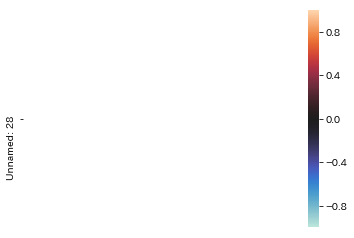

In [7]:

sns.heatmap(corr_sp,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            annot_kws={'size': 10},
            fmt='.2f',
            xticklabels=corr_sp.columns.values,
            yticklabels=corr_mat.columns[0:7].values
           )


plt.show()

ValueError: color kwarg must have one color per data set. 13 data sets and 1 colors were provided

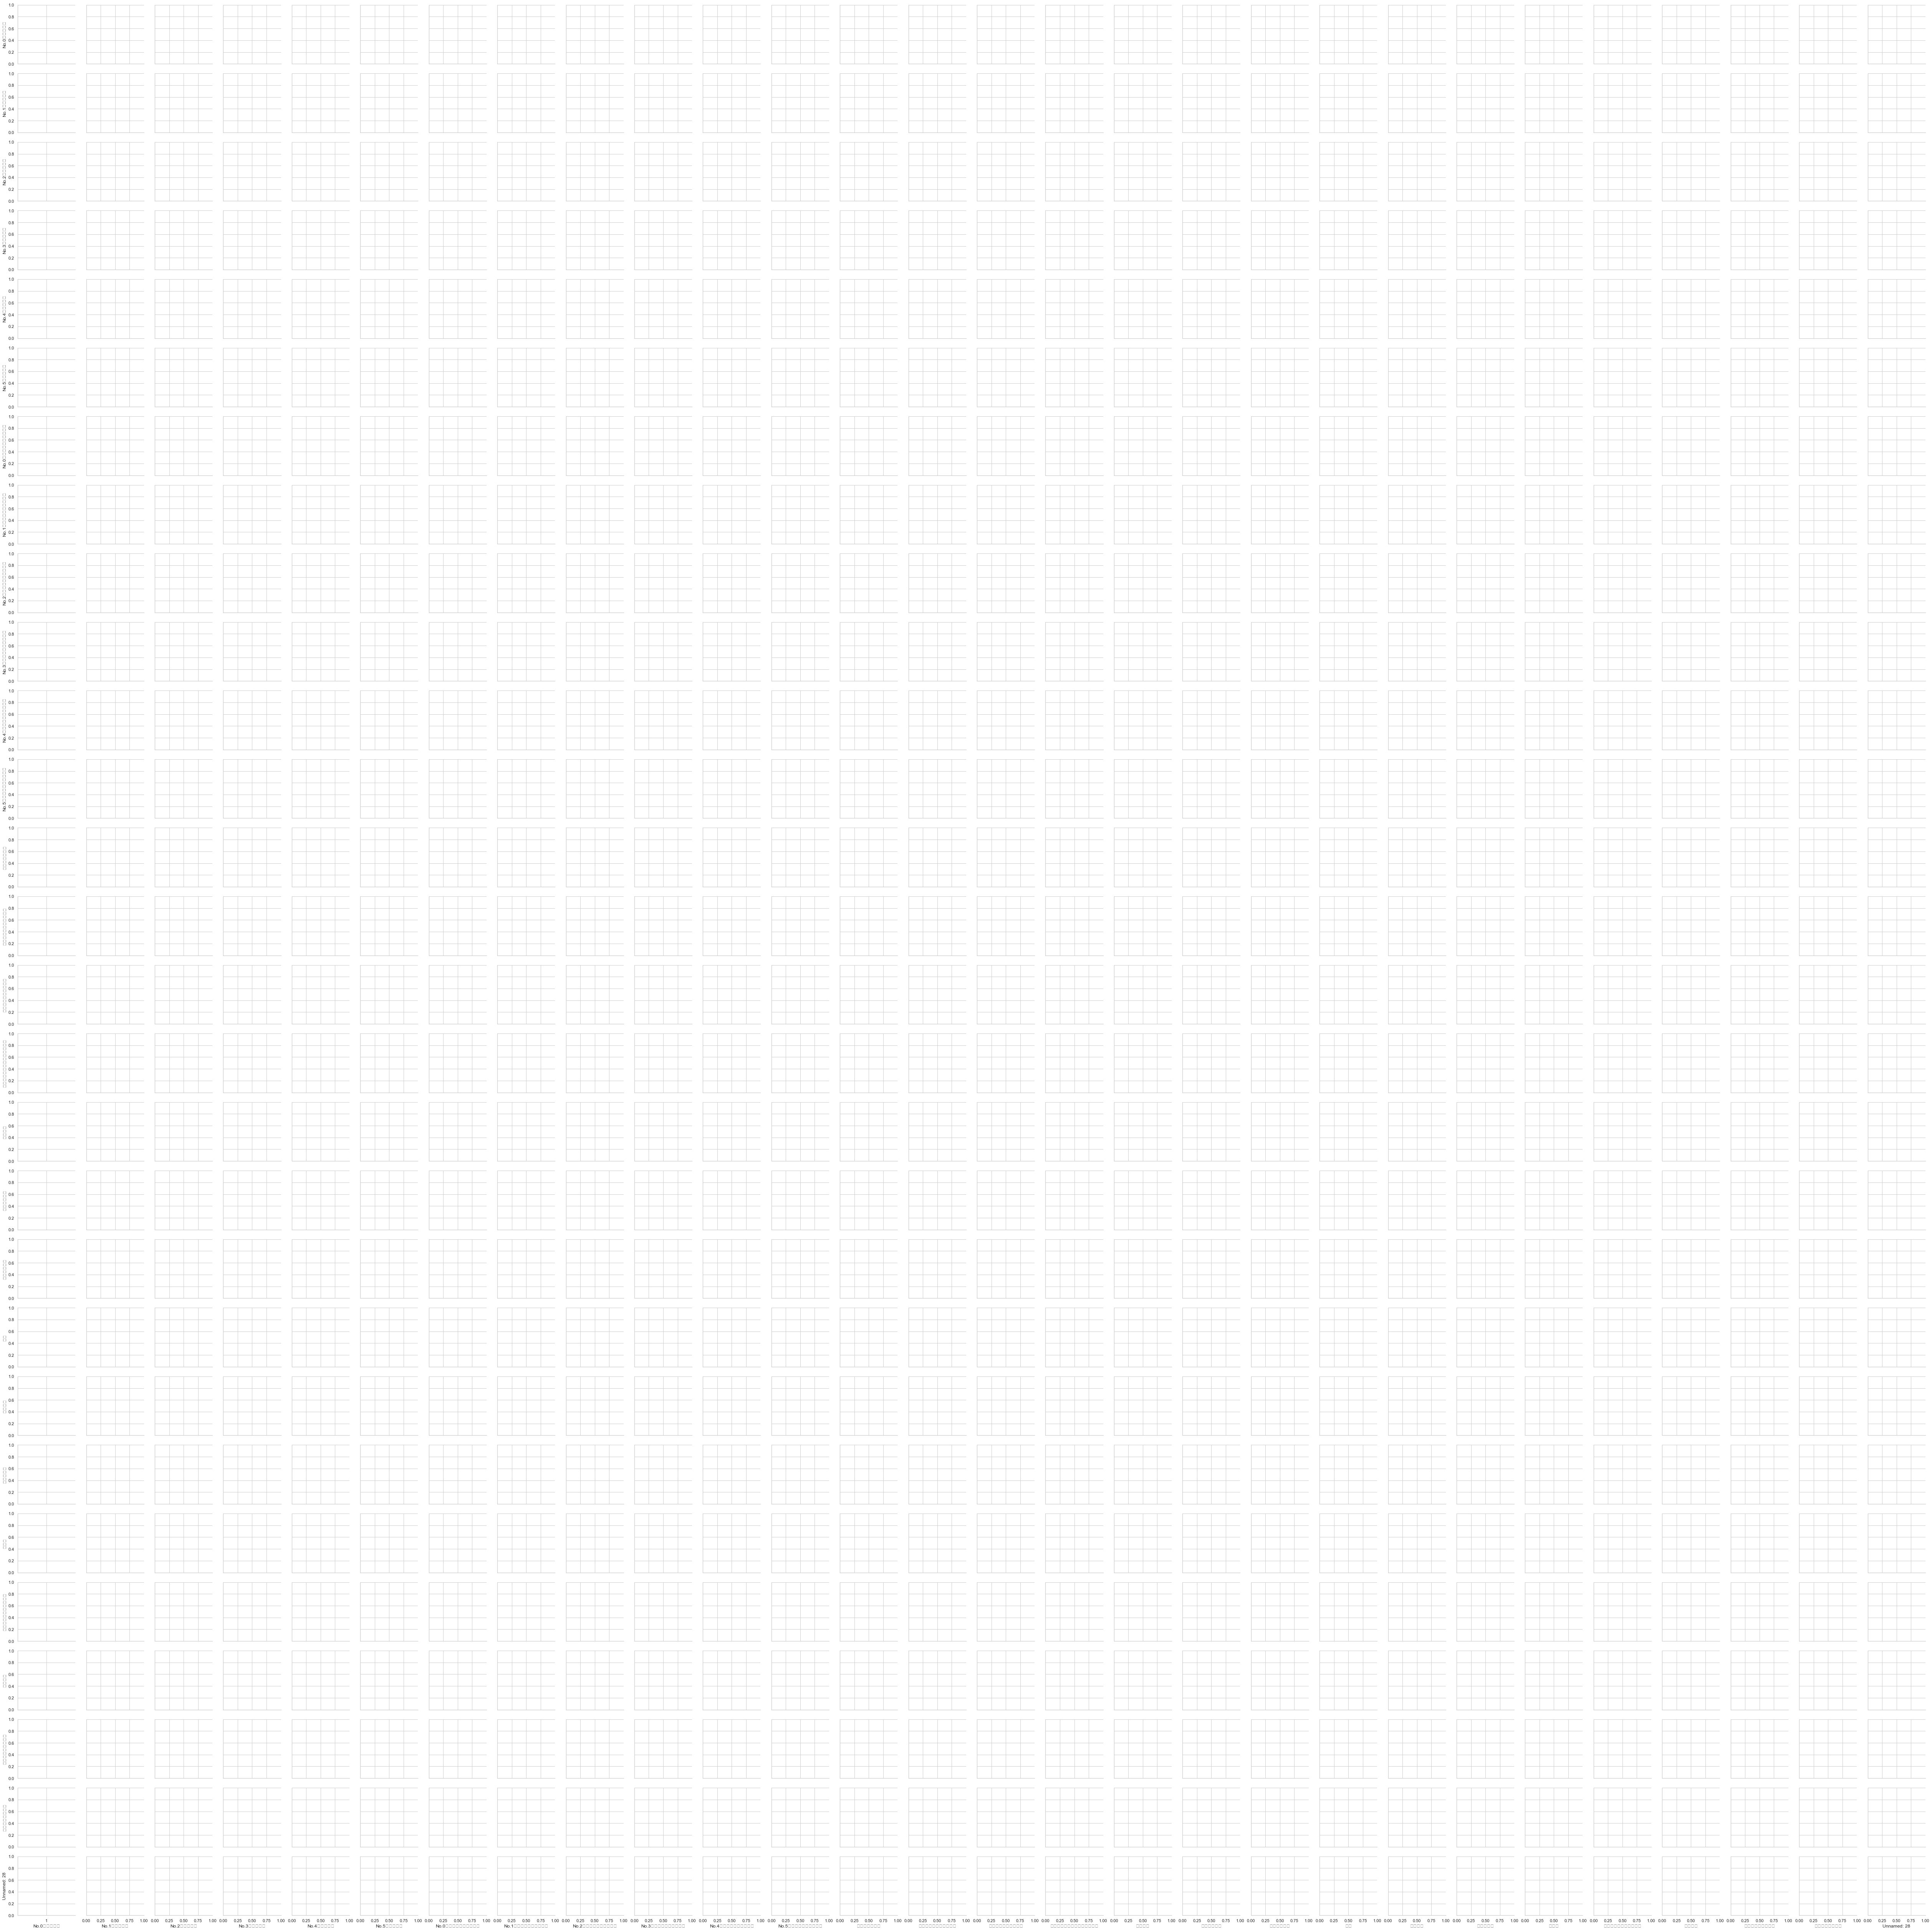

In [8]:
sns.set(style="whitegrid",context="notebook")
sns.pairplot(df[0:13])
plt.show()

In [16]:
lr = LinearRegression()


In [114]:
plt.scatter()


AttributeError: module 'matplotlib.pylab' has no attribute 'absolutescatter'

In [54]:
imr = Imputer(missing_values="NaN",strategy="median",axis=1)